# <div style="background-color:#fff1cc; padding: 40px;"><center> Auto-ML using Autogluon 👽</center>
 </div> 

![](https://i.pinimg.com/originals/e0/7c/81/e07c810beb24489a0d99d04a37cf7a3f.gif)


# Thanks for Visting this notebook 😊
<div class="alert alert-block alert-info" style="font-size:30px; font-family:verdana;">
    In this notebook I have used AutoGluon for AutoML,apart from the analysis I have trained the model separately on both targets - EC1,EC2 and created final submission CSV.Feel free to fork or edit the notebook.If you liked the notebook, consider upvoting it. It helps other people discover them.
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e18/test.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s3e18/sample_submission.csv')

In [3]:
desc = test.describe().transpose()

In [4]:
# 'id' column is not important hence going to drop it
# test data don't have columns namely ['EC3','EC4','EC5','EC6'],so we drop these columns

for df in [train,test]:
    df.drop('id',axis=1,inplace=True)
train.drop(['EC3','EC4','EC5','EC6'],axis=1,inplace=True)

In [5]:
train.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0


In [6]:
test.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,0.000000,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,29.783175,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,6.420822,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,47.360206,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0


In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(train, test_size=0.2, random_state=42)


![](https://user-images.githubusercontent.com/16392542/77208906-224aa500-6aba-11ea-96bd-e81806074030.png)

# Using AutoGluon


We start by defining a custom MultilabelPredictor class to manage a collection of TabularPredictor objects, one for each label. 

In [8]:
# !git clone https://github.com/awslabs/autogluon
# !cd autogluon && ./full_install.sh

In [9]:
!python3 -m pip install -U pip
!python3 -m pip install -U setuptools wheel
!python3 -m pip install autogluon


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-api 1.17.0 requires importlib-metadata~=6.0.0, but you have importlib-metadata 5.2.0 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [10]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.core.utils.loaders import load_pkl
from autogluon.core.utils.savers import save_pkl
import os.path
from autogluon.common.utils.utils import setup_outputdir
from sklearn.utils.parallel import delayed

In [11]:
class MultilabelPredictor():
    """ Tabular Predictor for predicting multiple columns in table.
        Creates multiple TabularPredictor objects which you can also use individually.
        You can access the TabularPredictor for a particular label via: `multilabel_predictor.get_predictor(label_i)`

        Parameters
        ----------
        labels : List[str]
            The ith element of this list is the column (i.e. `label`) predicted by the ith TabularPredictor stored in this object.
        path : str
            Path to directory where models and intermediate outputs should be saved.
            If unspecified, a time-stamped folder called "AutogluonModels/ag-[TIMESTAMP]" will be created in the working directory to store all models.
            Note: To call `fit()` twice and save all results of each fit, you must specify different `path` locations or don't specify `path` at all.
            Otherwise files from first `fit()` will be overwritten by second `fit()`.
            Caution: when predicting many labels, this directory may grow large as it needs to store many TabularPredictors.
        problem_types : List[str]
            The ith element is the `problem_type` for the ith TabularPredictor stored in this object.
        eval_metrics : List[str]
            The ith element is the `eval_metric` for the ith TabularPredictor stored in this object.
        consider_labels_correlation : bool
            Whether the predictions of multiple labels should account for label correlations or predict each label independently of the others.
            If True, the ordering of `labels` may affect resulting accuracy as each label is predicted conditional on the previous labels appearing earlier in this list (i.e. in an auto-regressive fashion).
            Set to False if during inference you may want to individually use just the ith TabularPredictor without predicting all the other labels.
        kwargs :
            Arguments passed into the initialization of each TabularPredictor.

    """

    multi_predictor_file = 'multilabel_predictor.pkl'

    def __init__(self, labels, path, problem_types=None, eval_metrics=None, consider_labels_correlation=True, **kwargs):
        if len(labels) < 2:
            raise ValueError("MultilabelPredictor is only intended for predicting MULTIPLE labels (columns), use TabularPredictor for predicting one label (column).")
        self.path = setup_outputdir(path, warn_if_exist=False)
        self.labels = labels
        self.consider_labels_correlation = consider_labels_correlation
        self.predictors = {}  # key = label, value = TabularPredictor or str path to the TabularPredictor for this label
        if eval_metrics is None:
            self.eval_metrics = {}
        else:
            self.eval_metrics = {labels[i] : eval_metrics[i] for i in range(len(labels))}
        problem_type = None
        eval_metric = None
        for i in range(len(labels)):
            label = labels[i]
            path_i = self.path + "Predictor_" + label
            if problem_types is not None:
                problem_type = problem_types[i]
            if eval_metrics is not None:
                eval_metric = self.eval_metrics[label]
            self.predictors[label] = TabularPredictor(label=label, problem_type=problem_type, eval_metric=eval_metric, path=path_i, **kwargs)

    def fit(self, train_data, tuning_data=None, **kwargs):
        """ Fits a separate TabularPredictor to predict each of the labels.

            Parameters
            ----------
            train_data, tuning_data : str or autogluon.tabular.TabularDataset or pd.DataFrame
                See documentation for `TabularPredictor.fit()`.
            kwargs :
                Arguments passed into the `fit()` call for each TabularPredictor.
        """
        if isinstance(train_data, str):
            train_data = TabularDataset(train_data)
        if tuning_data is not None and isinstance(tuning_data, str):
            tuning_data = TabularDataset(tuning_data)
        train_data_og = train_data.copy()
        if tuning_data is not None:
            tuning_data_og = tuning_data.copy()
        else:
            tuning_data_og = None
        save_metrics = len(self.eval_metrics) == 0
        for i in range(len(self.labels)):
            label = self.labels[i]
            predictor = self.get_predictor(label)
            if not self.consider_labels_correlation:
                labels_to_drop = [l for l in self.labels if l != label]
            else:
                labels_to_drop = [self.labels[j] for j in range(i+1, len(self.labels))]
            train_data = train_data_og.drop(labels_to_drop, axis=1)
            if tuning_data is not None:
                tuning_data = tuning_data_og.drop(labels_to_drop, axis=1)
            print(f"Fitting TabularPredictor for label: {label} ...")
            predictor.fit(train_data=train_data, tuning_data=tuning_data, **kwargs)
            self.predictors[label] = predictor.path
            if save_metrics:
                self.eval_metrics[label] = predictor.eval_metric
        self.save()

    def predict(self, data, **kwargs):
        """ Returns DataFrame with label columns containing predictions for each label.

            Parameters
            ----------
            data : str or autogluon.tabular.TabularDataset or pd.DataFrame
                Data to make predictions for. If label columns are present in this data, they will be ignored. See documentation for `TabularPredictor.predict()`.
            kwargs :
                Arguments passed into the predict() call for each TabularPredictor.
        """
        return self._predict(data, as_proba=False, **kwargs)

    def predict_proba(self, data, **kwargs):
        """ Returns dict where each key is a label and the corresponding value is the `predict_proba()` output for just that label.

            Parameters
            ----------
            data : str or autogluon.tabular.TabularDataset or pd.DataFrame
                Data to make predictions for. See documentation for `TabularPredictor.predict()` and `TabularPredictor.predict_proba()`.
            kwargs :
                Arguments passed into the `predict_proba()` call for each TabularPredictor (also passed into a `predict()` call).
        """
        return self._predict(data, as_proba=True, **kwargs)

    def evaluate(self, data, **kwargs):
        """ Returns dict where each key is a label and the corresponding value is the `evaluate()` output for just that label.

            Parameters
            ----------
            data : str or autogluon.tabular.TabularDataset or pd.DataFrame
                Data to evalate predictions of all labels for, must contain all labels as columns. See documentation for `TabularPredictor.evaluate()`.
            kwargs :
                Arguments passed into the `evaluate()` call for each TabularPredictor (also passed into the `predict()` call).
        """
        data = self._get_data(data)
        eval_dict = {}
        for label in self.labels:
            print(f"Evaluating TabularPredictor for label: {label} ...")
            predictor = self.get_predictor(label)
            eval_dict[label] = predictor.evaluate(data, **kwargs)
            if self.consider_labels_correlation:
                data[label] = predictor.predict(data, **kwargs)
        return eval_dict

    def save(self):
        """ Save MultilabelPredictor to disk. """
        for label in self.labels:
            if not isinstance(self.predictors[label], str):
                self.predictors[label] = self.predictors[label].path
        save_pkl.save(path=self.path+self.multi_predictor_file, object=self)
        print(f"MultilabelPredictor saved to disk. Load with: MultilabelPredictor.load('{self.path}')")

    @classmethod
    def load(cls, path):
        """ Load MultilabelPredictor from disk `path` previously specified when creating this MultilabelPredictor. """
        path = os.path.expanduser(path)
        if path[-1] != os.path.sep:
            path = path + os.path.sep
        return load_pkl.load(path=path+cls.multi_predictor_file)

    def get_predictor(self, label):
        """ Returns TabularPredictor which is used to predict this label. """
        predictor = self.predictors[label]
        if isinstance(predictor, str):
            return TabularPredictor.load(path=predictor)
        return predictor

    def _get_data(self, data):
        if isinstance(data, str):
            return TabularDataset(data)
        return data.copy()

    def _predict(self, data, as_proba=False, **kwargs):
        data = self._get_data(data)
        if as_proba:
            predproba_dict = {}
        for label in self.labels:
            print(f"Predicting with TabularPredictor for label: {label} ...")
            predictor = self.get_predictor(label)
            if as_proba:
                predproba_dict[label] = predictor.predict_proba(data, as_multiclass=True, **kwargs)
            data[label] = predictor.predict(data, **kwargs)
        if not as_proba:
            return data[self.labels]
        else:
            return predproba_dict

* Let’s now apply our multi-label predictor to predict multiple columns in a data table. 
* We first train models to predict each of the labels.

In [12]:
train_data.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
36,164.638339,5.736382,3.376292,3.376292,2.209209,2.209209,1.366713,0.604007,0.000000,17.919845,...,17.696186,0.000000,6.286161,0.000000,0.000000,21.500000,0,0,1,1
9482,91.284213,2.642734,1.707151,1.707151,0.930153,0.930153,0.403136,0.000000,5.969305,12.317275,...,0.000000,6.041841,12.317275,0.000000,9.589074,19.666667,1,1,1,1
5716,1660.735011,19.472142,13.944394,16.970136,10.871888,15.476936,10.878828,4.595178,90.658938,53.781027,...,6.923737,37.099000,69.141353,70.360588,50.697492,108.233129,0,0,1,0
10392,378.018438,10.911303,7.788460,8.813660,5.912790,6.223801,4.507624,2.087653,94.716284,0.000000,...,0.000000,0.000000,19.416663,96.815240,18.349406,86.116129,0,0,1,1
11845,484.066883,10.125864,7.787056,7.787056,5.526832,5.526832,3.239859,2.749578,0.000000,12.380376,...,60.845138,0.000000,10.969244,70.498243,6.420822,46.333333,0,0,1,1


In [13]:
labels = ['EC1','EC2']  # which columns to predict based on the others
problem_types = ['binary','binary']  # type of each prediction problem
save_path = 'agModels-predictEducationClass'  # specifies folder to store trained models



time_limit = 300
# how many seconds to train the TabularPredictor for each label,
#set much larger in your applications!

In [14]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)




In [15]:
from sklearn.utils.parallel import delayed

metric = 'roc_auc' 

multi_predictor = MultilabelPredictor(labels=labels, problem_types=problem_types, path=save_path)
multi_predictor.fit(train_data, time_limit=time_limit,presets='high_quality')

Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "agModels-predictEducationClass/Predictor_EC1/"
AutoGluon Version:  0.8.2
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Jun 28 11:06:41 UTC 2023
Disk Space Avail:   20.94 GB / 20.96 GB (99.9%)
Train Data Rows:    11870
Train Data Columns: 31
Label Column: EC1
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    32404.45 MB
	Train Data (Original)  Memory Usage: 2.94 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitt

Fitting TabularPredictor for label: EC1 ...


	0.6572	 = Validation score   (accuracy)
	1.21s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1 ... Training model for up to 296.63s of the 296.63s of remaining time.
	0.6552	 = Validation score   (accuracy)
	0.03s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 296.31s of the 296.3s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	0.7119	 = Validation score   (accuracy)
	29.9s	 = Training   runtime
	0.58s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 257.9s of the 257.89s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	0.7099	 = Validation score   (accuracy)
	27.18s	 = Training   runtime
	0.3s	 = Validation runtime
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 227.02s of the 227.02s of remaining time.
	0.7003	 = 

Fitting TabularPredictor for label: EC2 ...


	0.7585	 = Validation score   (accuracy)
	0.03s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1 ... Training model for up to 299.49s of the 299.49s of remaining time.
	0.7569	 = Validation score   (accuracy)
	0.03s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 299.15s of the 299.14s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	0.7971	 = Validation score   (accuracy)
	27.6s	 = Training   runtime
	0.34s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 267.58s of the 267.58s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	0.797	 = Validation score   (accuracy)
	26.07s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 237.4s of the 237.4s of remaining time.
	0.7938	 =

MultilabelPredictor saved to disk. Load with: MultilabelPredictor.load('agModels-predictEducationClass/')


# Inference and Evaluation

After training, you can easily use the MultilabelPredictor to predict all labels in new data:

In [16]:
test_data.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
11988,118.000000,3.060660,2.536175,2.536175,1.640774,1.640774,0.548756,0.182919,17.721856,0.000000,...,0.000000,0.000000,11.752550,12.841643,9.589074,33.833333,1,1,1,1
13039,378.018438,10.685872,7.066210,7.066210,6.041834,6.041834,4.039540,2.503411,12.514062,0.000000,...,0.000000,0.000000,23.468091,24.539800,13.825658,44.000000,0,0,0,1
13637,277.172776,1.732051,0.682574,1.462072,0.886443,0.886443,0.087310,0.000000,24.415866,12.356394,...,0.000000,0.000000,11.938611,19.262465,9.589074,44.333333,2,2,1,1
5537,377.203227,11.265362,9.264697,9.264697,6.445092,6.445092,4.308487,2.706995,42.723899,13.027704,...,0.000000,0.000000,17.744066,45.448667,28.250470,64.083333,0,0,0,0
8425,315.695337,5.985416,3.473678,3.473678,2.634453,2.634453,1.507705,0.672861,0.000000,17.919845,...,17.696186,6.066367,0.000000,6.103966,0.000000,37.166667,0,0,1,1


In [17]:
test_data.columns
test_nolabel = test_data

In [18]:
labels = ['EC1','EC2']
test_nolabel = test_data.drop(labels,axis=1)
test_nolabel.head()


,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
11988,118.000000,3.060660,2.536175,2.536175,1.640774,1.640774,0.548756,0.182919,17.721856,0.000000,...,5.969305,0.000000,0.000000,0.000000,11.752550,12.841643,9.589074,33.833333,1,1
13039,378.018438,10.685872,7.066210,7.066210,6.041834,6.041834,4.039540,2.503411,12.514062,0.000000,...,7.822697,0.000000,0.000000,0.000000,23.468091,24.539800,13.825658,44.000000,0,0
13637,277.172776,1.732051,0.682574,1.462072,0.886443,0.886443,0.087310,0.000000,24.415866,12.356394,...,11.938611,0.000000,0.000000,0.000000,11.938611,19.262465,9.589074,44.333333,2,2
5537,377.203227,11.265362,9.264697,9.264697,6.445092,6.445092,4.308487,2.706995,42.723899,13.027704,...,102.737085,45.448667,0.000000,0.000000,17.744066,45.448667,28.250470,64.083333,0,0
8425,315.695337,5.985416,3.473678,3.473678,2.634453,2.634453,1.507705,0.672861,0.000000,17.919845,...,0.000000,12.132734,17.696186,6.066367,0.000000,6.103966,0.000000,37.166667,0,0


1. Predicting on Test_data which is a part of Train (20%)

In [19]:
predictions = multi_predictor.predict(test_nolabel)
print("Predictions:  \n", predictions)

Predicting with TabularPredictor for label: EC1 ...
Predicting with TabularPredictor for label: EC2 ...
Predictions:  
        EC1  EC2
11988    1    1
13039    0    1
13637    1    1
5537     0    1
8425     1    1
...    ...  ...
1201     1    1
2727     1    1
5987     1    1
7656     0    1
9100     1    1

[2968 rows x 2 columns]


2. Predicting on Test (for competion submission)

In [20]:
predictions_final = multi_predictor.predict(test)
print("Predictions:  \n", predictions_final)

Predicting with TabularPredictor for label: EC1 ...
Predicting with TabularPredictor for label: EC2 ...
Predictions:  
       EC1  EC2
0       0    1
1       1    1
2       1    1
3       1    1
4       1    1
...   ...  ...
9888    1    1
9889    1    1
9890    0    1
9891    0    1
9892    0    1

[9893 rows x 2 columns]


In [21]:
predictions_final.head()

,EC1,EC2
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1


In [22]:
submission = sub
submission['EC1'] = predictions_final['EC1']
submission['EC2'] = predictions_final['EC2']
submission.to_csv(f'submission_autogluon.csv', index=False)

from IPython.display import FileLink
FileLink('submission_autogluon.csv')


#download csv by clicking on the link

/kaggle/working/submission_autogluon.csv

In [23]:
submission.head()

,id,EC1,EC2
0,14838,0,1
1,14839,1,1
2,14840,1,1
3,14841,1,1
4,14842,1,1


In [24]:
submission.shape

(9893, 3)

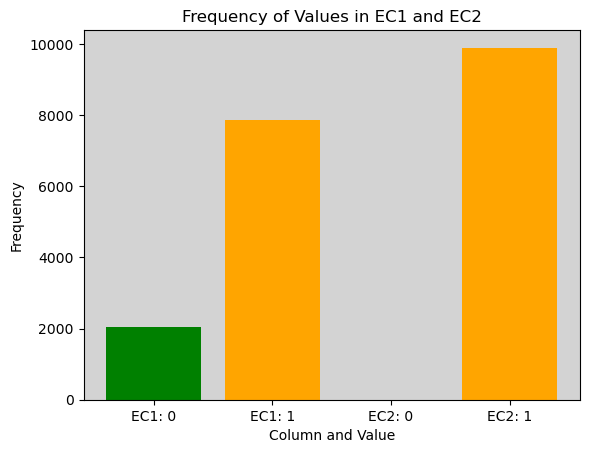

In [25]:
import matplotlib.pyplot as plt

# Get the value counts for each column

ec1_counts = submission['EC1'].value_counts()
ec2_counts = submission['EC2'].value_counts()

ec1_0 = ec1_counts[0] if 0 in ec1_counts else 0
ec1_1 = ec1_counts[1] if 1 in ec1_counts else 0
ec2_0 = ec2_counts[0] if 0 in ec2_counts else 0
ec2_1 = ec2_counts[1] if 1 in ec2_counts else 0

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(['EC1: 0', 'EC1: 1', 'EC2: 0', 'EC2: 1'], [ec1_0, ec1_1, ec2_0, ec2_1],color=['green', 'orange', 'green', 'orange'])

# Set the title and labels
ax.set_title('Frequency of Values in EC1 and EC2')
ax.set_xlabel('Column and Value')
ax.set_ylabel('Frequency')


ax.set_facecolor('lightgray')
# Show the plot
plt.show()


# Evaluation
* We can also easily evaluate the performance of our predictions if our new data contain the ground truth labels

In [26]:
evaluations = multi_predictor.evaluate(test_data)
print()
print(evaluations)
print()
print("Evaluated using metrics:", multi_predictor.eval_metrics)

Evaluation: accuracy on test data: 0.6994609164420486
Evaluations on test data:
{
    "accuracy": 0.6994609164420486,
    "balanced_accuracy": 0.613320083613141,
    "mcc": 0.26160573566675577,
    "roc_auc": 0.7078287535387451,
    "f1": 0.7943752881512218,
    "precision": 0.7344416027280477,
    "recall": 0.8649598393574297
}


Evaluating TabularPredictor for label: EC1 ...
Evaluating TabularPredictor for label: EC2 ...


Evaluation: accuracy on test data: 0.8086253369272237
Evaluations on test data:
{
    "accuracy": 0.8086253369272237,
    "balanced_accuracy": 0.5,
    "mcc": 0.0,
    "roc_auc": 0.5856697476525822,
    "f1": 0.8941877794336811,
    "precision": 0.8086253369272237,
    "recall": 1.0
}



{'EC1': {'accuracy': 0.6994609164420486, 'balanced_accuracy': 0.613320083613141, 'mcc': 0.26160573566675577, 'roc_auc': 0.7078287535387451, 'f1': 0.7943752881512218, 'precision': 0.7344416027280477, 'recall': 0.8649598393574297}, 'EC2': {'accuracy': 0.8086253369272237, 'balanced_accuracy': 0.5, 'mcc': 0.0, 'roc_auc': 0.5856697476525822, 'f1': 0.8941877794336811, 'precision': 0.8086253369272237, 'recall': 1.0}}

Evaluated using metrics: {'EC1': accuracy, 'EC2': accuracy}


* Accessing tabular prediction with only one label

In [27]:
# EC1
predictor_class = multi_predictor.get_predictor('EC1')
predictor_class.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.712637,1.002590,105.961663,0.039411,8.978258,2,False,14
1,CatBoost_BAG_L1,0.712300,0.077905,39.904075,0.077905,39.904075,1,False,7
2,LightGBMXT_BAG_L1,0.711879,0.583592,29.896972,0.583592,29.896972,1,False,3
3,XGBoost_BAG_L1,0.711542,0.150514,22.631819,0.150514,22.631819,1,False,11
4,LightGBM_BAG_L1,0.709857,0.301683,27.182358,0.301683,27.182358,1,False,4
5,NeuralNetFastAI_BAG_L1,0.709014,0.434025,66.776788,0.434025,66.776788,1,False,10
6,NeuralNetTorch_BAG_L1,0.707582,0.710295,48.199224,0.710295,48.199224,1,False,12
7,LightGBMLarge_BAG_L1,0.702106,0.240222,15.839123,0.240222,15.839123,1,False,13
8,RandomForestEntr_BAG_L1,0.701685,0.723732,7.207281,0.723732,7.207281,1,True,6
9,ExtraTreesGini_BAG_L1,0.701432,0.819818,2.413344,0.819818,2.413344,1,True,8


In [28]:
# EC2
predictor_class = multi_predictor.get_predictor('EC2')
predictor_class.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L1,0.797051,0.336576,27.603745,0.336576,27.603745,1,False,3
1,WeightedEnsemble_L2,0.797051,0.375967,35.836786,0.039391,8.233041,2,False,14
2,XGBoost_BAG_L1,0.796967,0.135893,19.021787,0.135893,19.021787,1,False,11
3,LightGBM_BAG_L1,0.796967,0.163190,26.068101,0.163190,26.068101,1,False,4
4,LightGBMLarge_BAG_L1,0.796967,0.194995,50.090649,0.194995,50.090649,1,False,13
5,NeuralNetFastAI_BAG_L1,0.796967,0.614834,62.001534,0.614834,62.001534,1,False,10
6,CatBoost_BAG_L1,0.796799,0.140971,22.885147,0.140971,22.885147,1,False,7
7,NeuralNetTorch_BAG_L1,0.796546,0.709428,34.353994,0.709428,34.353994,1,False,12
8,ExtraTreesGini_BAG_L1,0.793934,0.809364,2.792470,0.809364,2.792470,1,True,8
9,RandomForestGini_BAG_L1,0.793766,0.724853,5.838104,0.724853,5.838104,1,True,5



# <div style="background-color:#fff1cc; padding: 120px;">I Thank you for viewing my work.If you like it, consider sharing it to others or give feedback to improve the notebook 😊.

 </div>
